# Oil Stocks Portfolio


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
from tabulate import tabulate
from scipy.stats import norm
import warnings
warnings.filterwarnings("ignore")

# yahoo finance is used to fetch data 
import yfinance as yf
yf.pdr_override()

In [2]:
# input
symbols = ['SPY', 'COP','DVN','ENB','XOM', 'PSX']
start = '2021-01-20'
end = '2022-03-25'

title = 'Oil'


# Read data 
df = yf.download(symbols,start,end)['Adj Close']

# View Columns
df.head()

[*********************100%***********************]  6 of 6 completed


,COP,DVN,ENB,PSX,SPY,XOM
Date,,,,,,
2021-01-20,43.331455,18.493940,32.188637,70.495567,377.666870,45.681244
2021-01-21,41.258499,17.030722,31.726982,68.410362,378.011200,44.371586
2021-01-22,40.780857,16.484331,31.373959,67.839951,376.673248,43.744427
2021-01-25,40.675781,16.086117,31.301540,67.400459,378.158783,43.255619
2021-01-26,39.816029,15.604551,31.555000,66.680450,377.568481,42.305653


In [3]:
df.tail()

,COP,DVN,ENB,PSX,SPY,XOM
Date,,,,,,
2022-03-18,98.859367,58.270000,44.151752,77.958603,444.519989,77.872330
2022-03-21,101.995872,61.439999,44.555458,79.809570,444.390015,81.366539
2022-03-22,101.013222,60.630001,44.516071,78.978127,449.589996,81.010185
2022-03-23,103.593903,61.669998,44.368378,79.453239,443.799988,82.287109
2022-03-24,103.762634,61.540001,44.713001,80.294594,450.489990,82.534576


In [4]:
from datetime import datetime
from dateutil import relativedelta

d1 = datetime.strptime(start, "%Y-%m-%d")
d2 = datetime.strptime(end, "%Y-%m-%d")
delta = relativedelta.relativedelta(d2,d1)
print('How many years of investing?')
print('%s years' % delta.years)

How many years of investing?
1 years


In [5]:
from datetime import datetime

def calculate_years(start, end): 
    date_format = "%Y-%m-%d"
    a = datetime.strptime(start, date_format).year
    b = datetime.strptime(end, date_format).year
    years = b - a
  
    return years 

In [6]:
print(calculate_years(start, end), 'years')

1 years


In [7]:
Cash = 100000
print('Percentage of invest:')
percent_invest = [0.167, 0.167, 0.167, 0.167, 0.167, 0.167]
for i, x in zip(df.columns, percent_invest):
    cost = x * Cash
    print('{}: {}'.format(i, cost))

Percentage of invest:
COP: 16700.0
DVN: 16700.0
ENB: 16700.0
PSX: 16700.0
SPY: 16700.0
XOM: 16700.0


In [8]:
print('Number of Shares:')
percent_invest = [0.167, 0.167, 0.167, 0.167, 0.167, 0.167]
for i, x, y in zip(df.columns, percent_invest, df.iloc[0]):
    cost = x * Cash
    shares = int(cost/y)
    print('{}: {}'.format(i, shares))

Number of Shares:
COP: 385
DVN: 902
ENB: 518
PSX: 236
SPY: 44
XOM: 365


In [9]:
print('Beginning Value:')
percent_invest = [0.167, 0.167, 0.167, 0.167, 0.167, 0.167]
for i, x, y in zip(df.columns, percent_invest, df.iloc[0]):
    cost = x * Cash
    shares = int(cost/y)
    Begin_Value = round(shares * y, 2)
    print('{}: ${}'.format(i, Begin_Value))

Beginning Value:
COP: $16682.61
DVN: $16681.53
ENB: $16673.71
PSX: $16636.95
SPY: $16617.34
XOM: $16673.65


In [10]:
print('Current Value:')
percent_invest = [0.167, 0.167, 0.167, 0.167, 0.167, 0.167]
for i, x, y, z in zip(df.columns, percent_invest, df.iloc[0], df.iloc[-1]):
    cost = x * Cash
    shares = int(cost/y)
    Current_Value = round(shares * z, 2)
    print('{}: ${}'.format(i, Current_Value))

Current Value:
COP: $39948.61
DVN: $55509.08
ENB: $23161.33
PSX: $18949.52
SPY: $19821.56
XOM: $30125.12


In [11]:
result = []
percent_invest = [0.167, 0.167, 0.167, 0.167, 0.167, 0.167]
for i, x, y, z in zip(df.columns, percent_invest, df.iloc[0], df.iloc[-1]):
    cost = x * Cash
    shares = int(cost/y)
    Current_Value = round(shares * z, 2)
    result.append(Current_Value)
print('Total Value: $%s' % round(sum(result),2))

Total Value: $187515.22


In [12]:
print('Holding Period Return:') # Calculate without Dividends
for i, x, y in zip(df.columns, df.iloc[0], df.iloc[-1]):
    HPR = (y - x) / x
    print('Holding Period Return: {}: {}%'.format(i, round(HPR,4)*100))

Holding Period Return:
Holding Period Return: COP: 139.46%
Holding Period Return: DVN: 232.76%
Holding Period Return: ENB: 38.91%
Holding Period Return: PSX: 13.900000000000002%
Holding Period Return: SPY: 19.28%
Holding Period Return: XOM: 80.67%


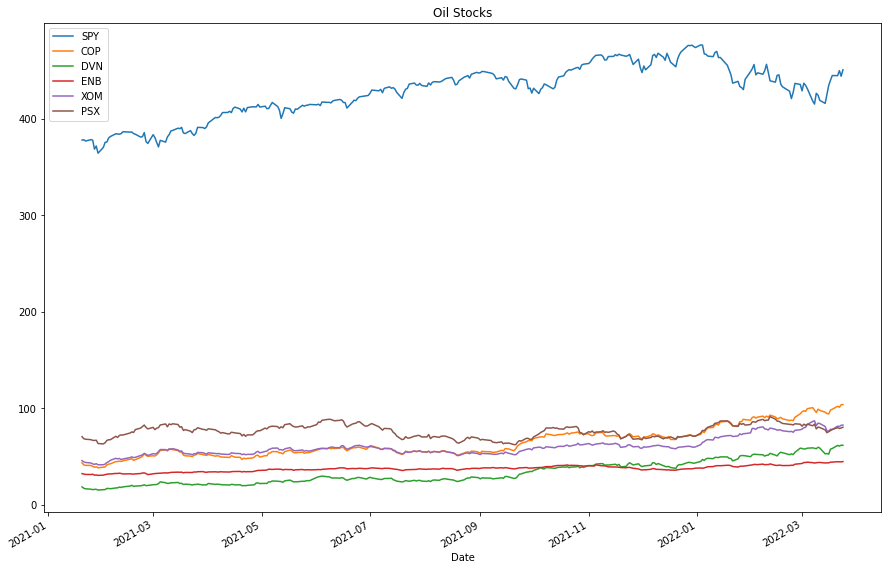

In [13]:
for s in symbols: 
    df[s].plot(label = s, figsize = (15,10))
plt.title(title + ' Stocks')
plt.legend()

In [14]:
# Normalize the data
normalize = (df - df.min())/ (df.max() - df.min())

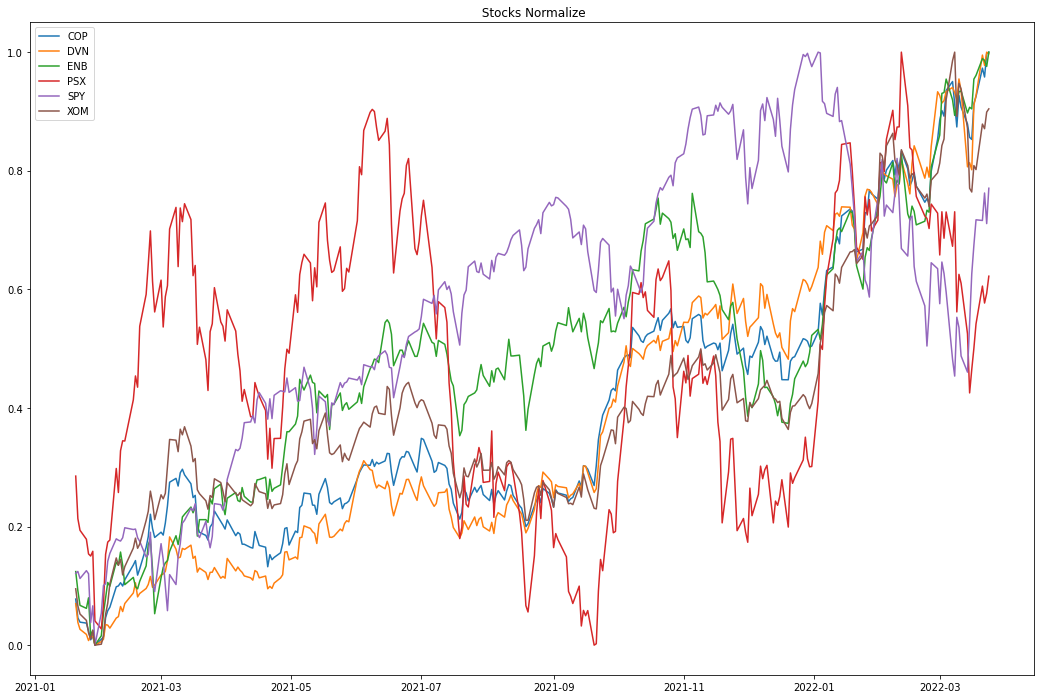

In [15]:
plt.figure(figsize=(18,12))
plt.plot(normalize)
plt.title(' Stocks Normalize')
plt.legend(labels=normalize.columns)

In [16]:
df.min()

COP     38.239811
DVN     15.243376
ENB     30.414452
PSX     62.209774
SPY    364.070892
XOM     41.355682
dtype: float64

In [17]:
for s in symbols:
    print(s + ":",  df[s].max())

SPY: 476.23052978515625
COP: 103.76263427734375
DVN: 61.66999816894531
ENB: 44.7130012512207
XOM: 86.88996124267578
PSX: 91.27658081054688


In [18]:
# Creating a Return Data Frame for all individual stocks: 
returns = pd.DataFrame()
for s in symbols: 
    returns[s + " Return"] = df[s].pct_change().dropna()
    
returns.head(4)

,SPY Return,COP Return,DVN Return,ENB Return,XOM Return,PSX Return
Date,,,,,,
2021-01-21,0.000912,-0.047840,-0.079119,-0.014342,-0.028669,-0.029579
2021-01-22,-0.003539,-0.011577,-0.032083,-0.011127,-0.014134,-0.008338
2021-01-25,0.003944,-0.002577,-0.024157,-0.002308,-0.011174,-0.006478
2021-01-26,-0.001561,-0.021137,-0.029937,0.008097,-0.021962,-0.010683


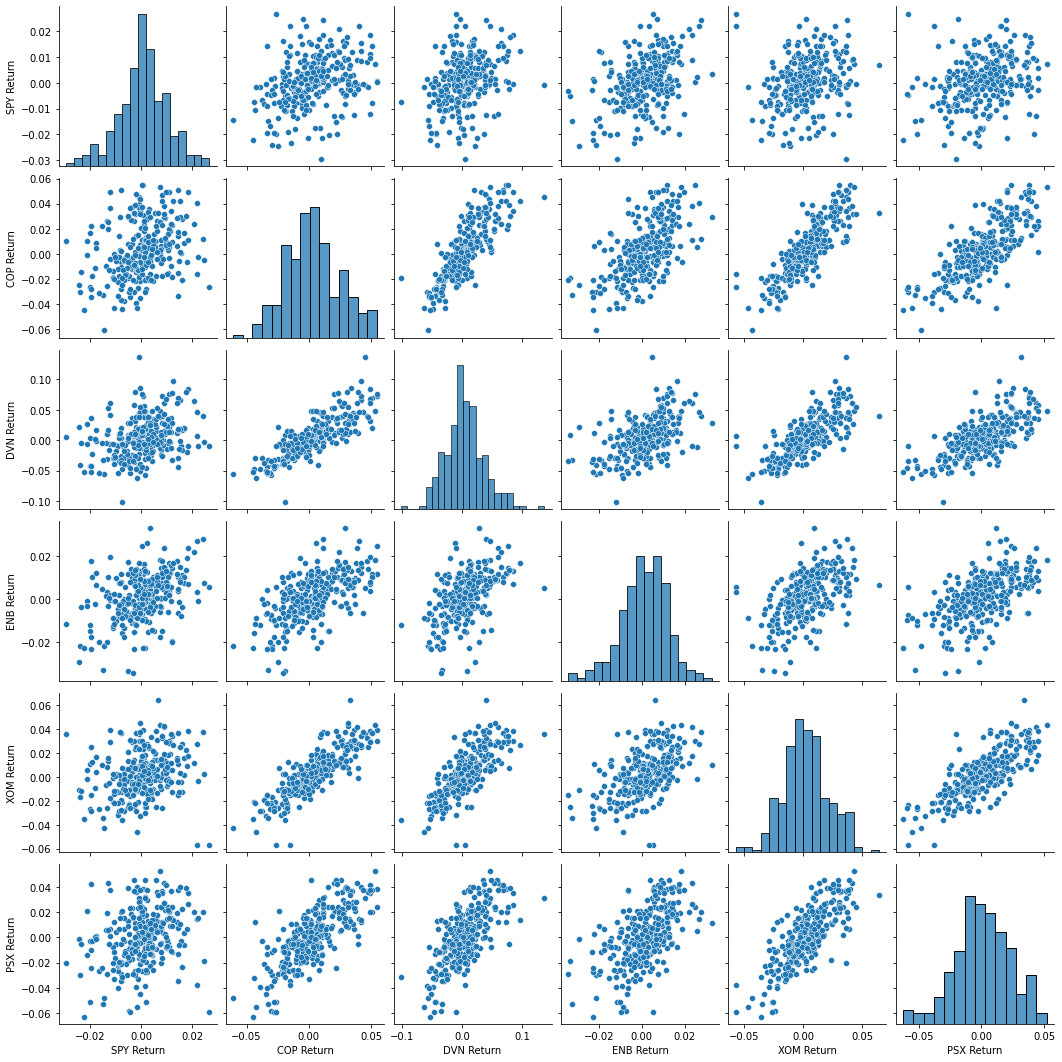

In [19]:
sns.pairplot(returns[1:] )

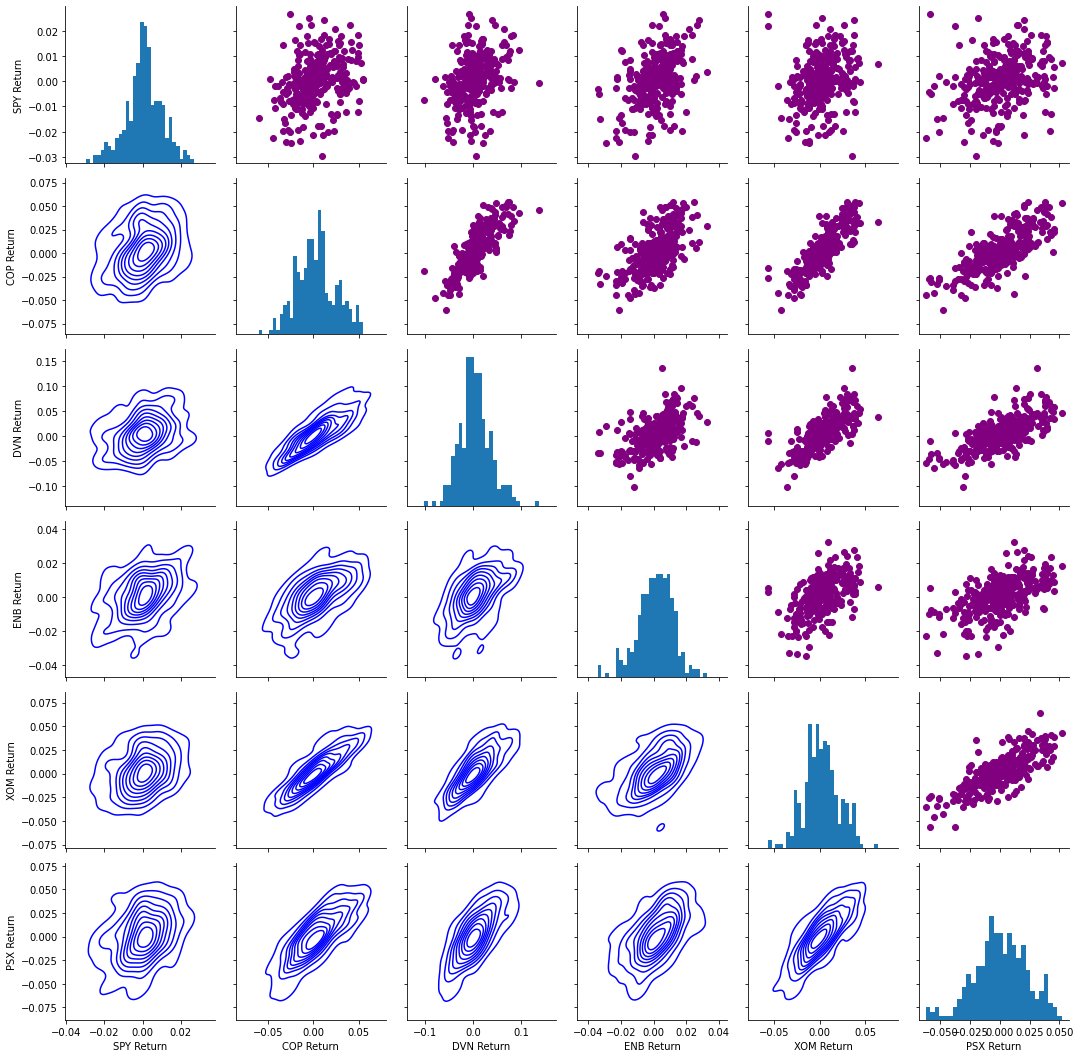

In [20]:
nplot = len(returns.columns)

ax = sns.PairGrid(returns)
ax.map_upper(plt.scatter, color='purple')
ax.map_lower(sns.kdeplot, color='blue')
ax.map_diag(plt.hist, bins=30)
for i in range(nplot) :
    for j in range(nplot) :
        ax.axes[i, j].locator_params(axis='x', nbins=6, tight=True)

<AxesSubplot:>

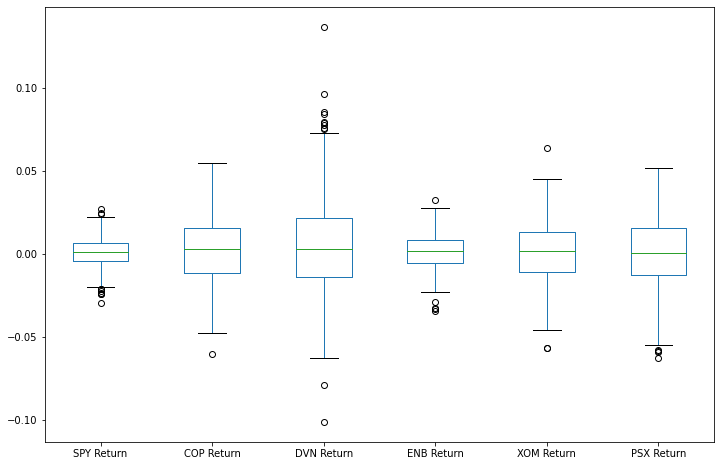

In [21]:
returns.plot(kind='box',figsize=(12,8))

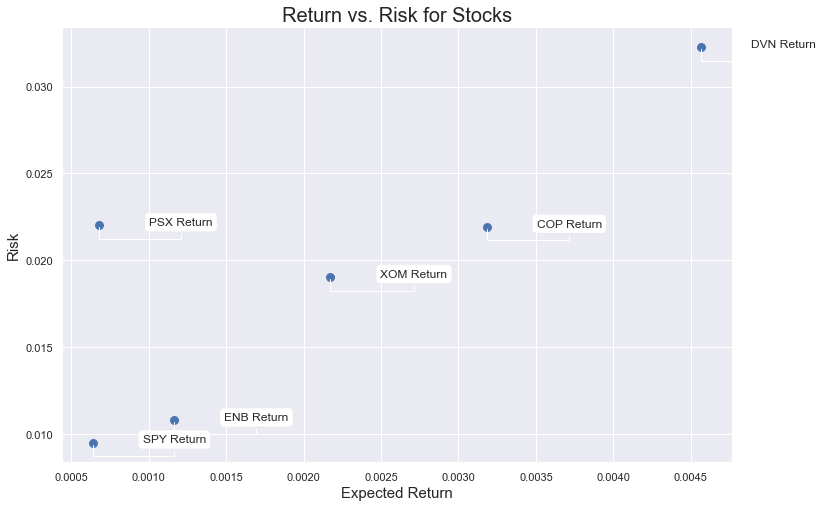

In [22]:
area = np.pi*20.0

sns.set(style='darkgrid')
plt.figure(figsize=(12,8))
plt.scatter(returns.mean(), returns.std(), s=area)
plt.xlabel("Expected Return", fontsize=15)
plt.ylabel("Risk", fontsize=15)
plt.title("Return vs. Risk for Stocks", fontsize=20)

for label, x, y in zip(returns.columns, returns.mean(), returns.std()) : 
    plt.annotate(label, xy=(x,y), xytext=(50, 0), textcoords='offset points',
                arrowprops=dict(arrowstyle='-', connectionstyle='bar,angle=180,fraction=-0.2'),
                bbox=dict(boxstyle="round", fc="w"))

In [23]:
table = pd.DataFrame()
table['Average Returns'] = returns.mean()
table['Minimum Returns'] = returns.min()
table['Maximum Returns'] = returns.max()
table['Median Returns'] = returns.median()
table['Risk'] = returns.std()
table.sort_values(by='Average Returns')

,Average Returns,Minimum Returns,Maximum Returns,Median Returns,Risk
SPY Return,0.000639,-0.029479,0.026811,0.000900,0.009514
PSX Return,0.000681,-0.062542,0.052055,0.000542,0.022020
ENB Return,0.001165,-0.034362,0.032673,0.001926,0.010788
XOM Return,0.002174,-0.056913,0.064113,0.001806,0.019047
COP Return,0.003183,-0.060707,0.054674,0.002699,0.021935
DVN Return,0.004569,-0.101467,0.137048,0.002938,0.032268


In [24]:
table.sort_values(by='Risk')

,Average Returns,Minimum Returns,Maximum Returns,Median Returns,Risk
SPY Return,0.000639,-0.029479,0.026811,0.000900,0.009514
ENB Return,0.001165,-0.034362,0.032673,0.001926,0.010788
XOM Return,0.002174,-0.056913,0.064113,0.001806,0.019047
COP Return,0.003183,-0.060707,0.054674,0.002699,0.021935
PSX Return,0.000681,-0.062542,0.052055,0.000542,0.022020
DVN Return,0.004569,-0.101467,0.137048,0.002938,0.032268


In [25]:
# dates each stock had the best and worst single day returns. 
print(returns.idxmax())

SPY Return   2022-03-09
COP Return   2021-02-03
DVN Return   2021-06-01
ENB Return   2021-11-05
XOM Return   2022-02-01
PSX Return   2021-02-08
dtype: datetime64[ns]


In [26]:
# dates each stock had the best and worst single day returns. 
print(returns.idxmin())

SPY Return   2022-03-07
COP Return   2021-03-18
DVN Return   2022-03-14
ENB Return   2022-02-14
XOM Return   2022-03-15
PSX Return   2021-11-26
dtype: datetime64[ns]


In [27]:
returns.corr()

,SPY Return,COP Return,DVN Return,ENB Return,XOM Return,PSX Return
SPY Return,1.000000,0.295446,0.314781,0.408162,0.228853,0.278552
COP Return,0.295446,1.000000,0.826730,0.607458,0.851755,0.765399
DVN Return,0.314781,0.826730,1.000000,0.521862,0.745049,0.698034
ENB Return,0.408162,0.607458,0.521862,1.000000,0.549986,0.571750
XOM Return,0.228853,0.851755,0.745049,0.549986,1.000000,0.781307
PSX Return,0.278552,0.765399,0.698034,0.571750,0.781307,1.000000


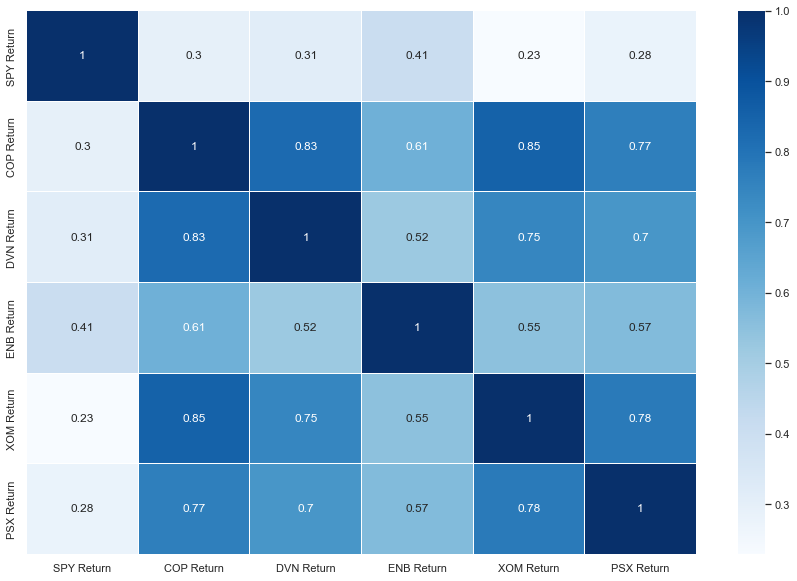

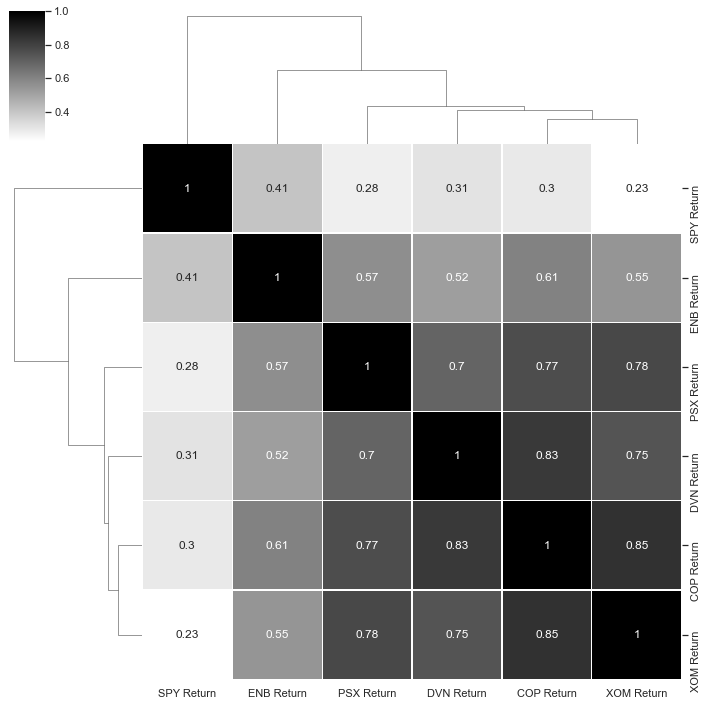

In [28]:
# Heatmap for return of all the stocks
plt.figure(figsize=(15,10))
sns.heatmap(returns.corr(), cmap="Blues",linewidths=.1, annot= True)


sns.clustermap(returns.corr(), cmap="binary",linewidths=.1, annot= True)

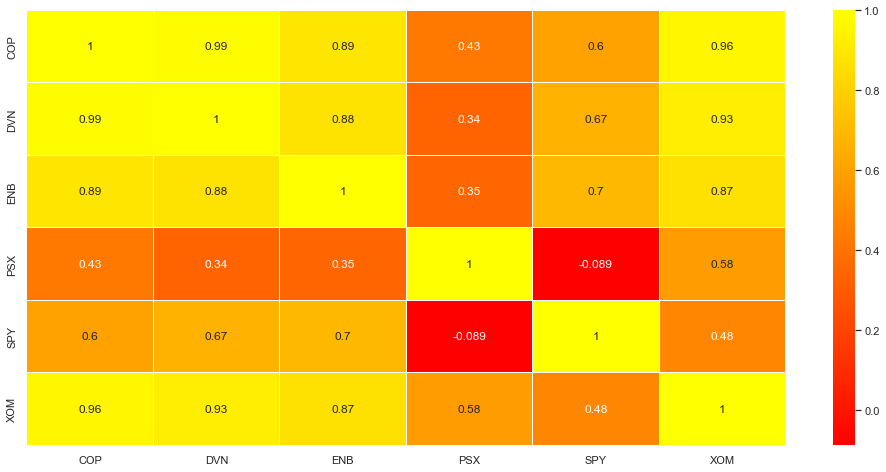

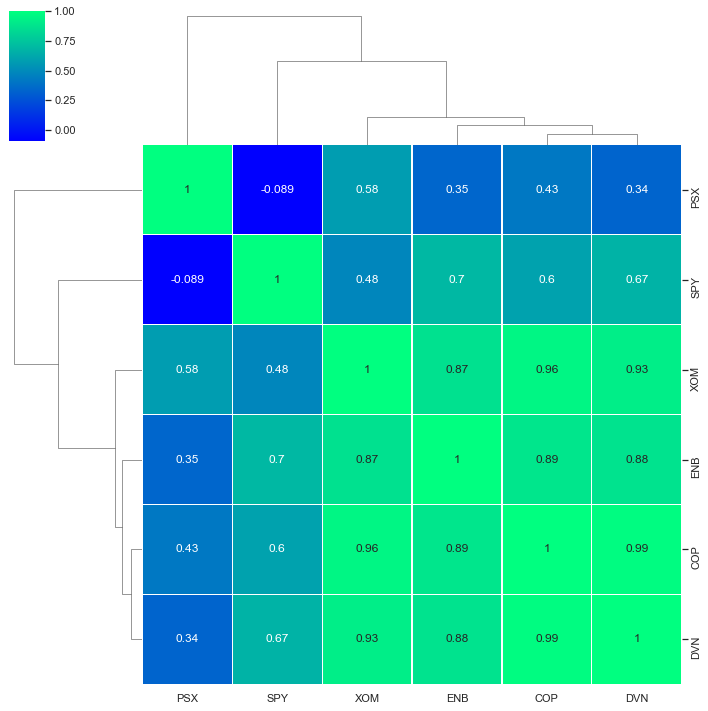

In [29]:
# heatmap for Adj. Close prices for all the stock
plt.figure(figsize = (17,8))
sns.heatmap(df.corr(), cmap="autumn",linewidths=.1, annot= True)


sns.clustermap(df.corr(), cmap="winter",linewidths=.1, annot= True)

In [30]:
returns = df.pct_change().dropna()
mean = np.mean(returns)
std_dev = np.std(returns)

In [31]:
VaR_90 = norm.ppf(1-0.9, mean, std_dev)
VaR_95 = norm.ppf(1-0.95, mean, std_dev)
VaR_99 = norm.ppf(1-0.99, mean, std_dev)

In [32]:
print(tabulate([['90%', VaR_90], ['95%', VaR_95], ['99%', VaR_99]], headers=['Confidence Level', 'Value at Risk']))

Confidence Level    Value at Risk
------------------  -------------------------------------------------------------------------
90%                 [-0.02487978 -0.03671429 -0.01263636 -0.02749094 -0.01153275 -0.02219403]
95%                 [-0.03283524 -0.04841765 -0.01654893 -0.03547721 -0.01498327 -0.02910204]
99%                 [-0.04775836 -0.0703712  -0.02388827 -0.05045812 -0.02145587 -0.0420603 ]


In [33]:
print('Value-at-Risk Confidence Level 90%:')
for i, x in zip(df.columns, VaR_90):
    print('{}: {}'.format(i, round(x,4)))

Value-at-Risk Confidence Level 90%:
COP: -0.0249
DVN: -0.0367
ENB: -0.0126
PSX: -0.0275
SPY: -0.0115
XOM: -0.0222


In [34]:
print('Value-at-Risk Confidence Level 90%:')

for i, x  in zip(df.columns, VaR_90):
    print('{}: ${}'.format(i, -round(x,4)*100000))

Value-at-Risk Confidence Level 90%:
COP: $2490.0
DVN: $3670.0000000000005
ENB: $1260.0
PSX: $2750.0
SPY: $1150.0
XOM: $2220.0


In [35]:
print('Value-at-Risk Confidence Level 99%:')

for i, x  in zip(df.columns, VaR_99):
    print('{}: ${}'.format(i, -round(x,4)*100000))

Value-at-Risk Confidence Level 99%:
COP: $4780.0
DVN: $7040.0
ENB: $2390.0
PSX: $5050.0
SPY: $2150.0
XOM: $4210.0
